In [2]:
# Author: Ehud Behar
import os
import glob 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
os.chdir(r"C:\Users\ehud\Documents\bell-pepper\2025-04-28")
print("Working directory is\n", os.getcwd())

Working directory is
 C:\Users\ehud\Documents\bell-pepper\2025-04-28


In [5]:
def append_columns(directory):
    os.path.join(os.getcwd(),directory) # Set the current working directory
    csv_files=glob.glob(os.path.join(os.getcwd(),directory,"*.csv"))  # Find all .csv files in "directory"
    # from each csv file, read only the "Intensity" column and concatenate all columns to one dataframe, which we shall call `dataset`:
    dataset=pd.concat(
        [
            pd.read_csv(file, usecols=["Intensity"]).rename(
                columns={"Intensity":os.path.splitext(
        os.path.join(
        os.path.basename(os.path.dirname(file))
        ,
        os.path.basename(file)
        )
    )[0]}
            )
            for file in csv_files
        ],
        axis=1
    )
    # prepend to this dataframe the wavelength column and reset the result. The wv column is taken from one of the csv files that has already been read to the above dataframe.
    # All wv columns in this directory should be identical; For convenience we take the column from the first file.

    # Read the Wavelength column from the first csv file
    wavelength = pd.read_csv(csv_files[0], usecols=["Wavelength"]).rename(columns={"Wavelength":"wv"})

    dataset=pd.concat([wavelength, dataset], axis=1)
    return dataset

In [6]:
pdb10=append_columns("PDB\PDB10")
pdb5=append_columns("PDB\PDB5")

In [7]:
def numeric_integrals(dataset):
    # 
    results = {}

    for col in range(dataset.shape[1] - 1):
        col_name = dataset.columns[col + 1]
        integral = np.trapezoid(dataset.iloc[:, col + 1], dataset['wv'])
        results[col_name] = integral
    # Convert the results to a DataFrame if needed
    integrals = pd.DataFrame([results])
    del results
    del col_name
    del integral
    return integrals

Text(0.5, 1.0, 'PDB disc, 5% and 10%, Spectral integral')

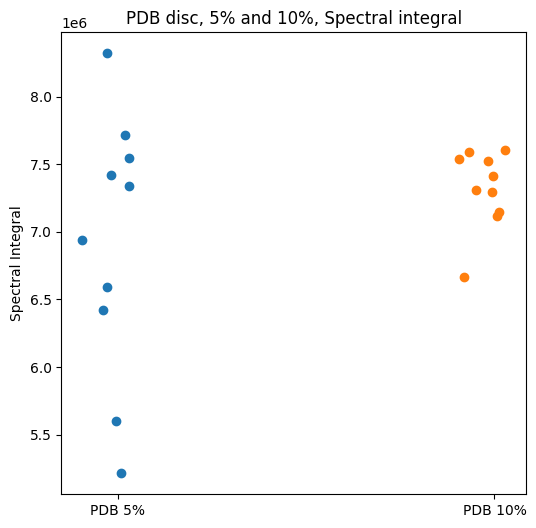

In [8]:
plt.figure(figsize=(6, 6))
for i, dataset in enumerate([pdb5, pdb10], start=1):
    plt.scatter(
        np.random.normal(loc=i, scale=0.05, size=len(numeric_integrals(dataset).keys())),
        numeric_integrals(dataset).iloc[0].values,
        label=f'Dataset {i}'
    )
plt.xticks([1,2], ["PDB 5%","PDB 10%"])
plt.xlabel('')
plt.ylabel('Spectral Integral')
plt.title('PDB disc, 5% and 10%, Spectral integral')

In [9]:
# plt.figure(figsize=(10, 6))
# for column in pdb5.columns[1:]:  # Skip the 'wv' column
#     plt.plot(pdb5['wv'], pdb5[column], label=column)

# plt.xlabel('Wavelength (nm)')
# plt.ylabel('Intensity (counts)')
# plt.title('PDB5 vs Wavelength')
# plt.legend(loc='upper right', fontsize='small')
# plt.show()

def listlineplot(dataframe):
    plt.figure(figsize=(10, 6))
    for column in dataframe.columns[1:]:  # Skip the 'wv' column
        plt.plot(dataframe['wv'], dataframe[column], label=column,alpha=0.7,linewidth=0.8)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity (counts)')
    plt.legend(loc='upper right', fontsize='small')
    plt.show()

In [89]:
listlineplot(pdb10)
listlineplot(pdb5)

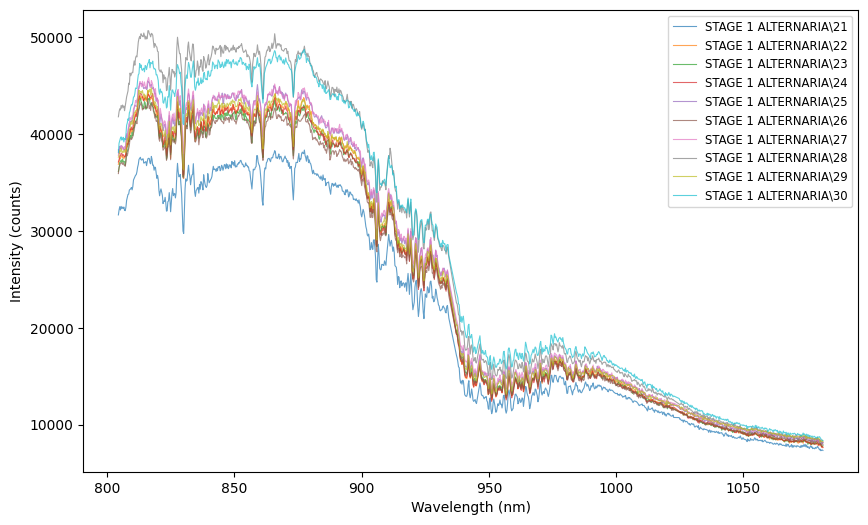

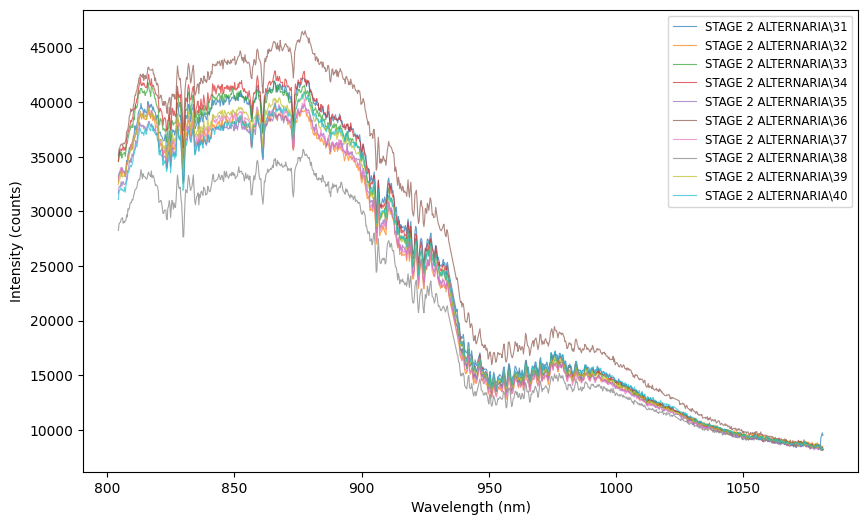

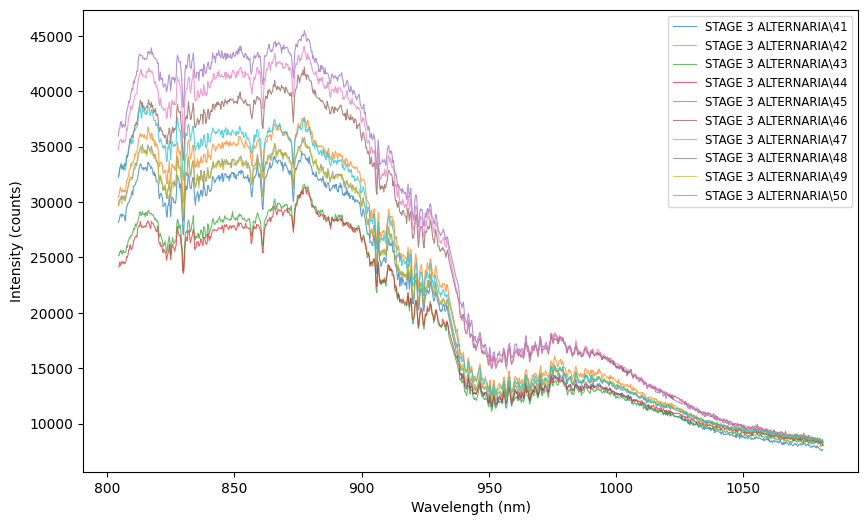

In [87]:
path="DISC+FUNGI"
for d in os.listdir(path):
    listlineplot(
        append_columns(os.path.join(path,d))
    )

In [90]:
path="DISC+H2O2"
for d in os.listdir(path):
    listlineplot(
        append_columns(os.path.join(path,d))
    )

In [1]:
path="SEEDS+H2O2"
for d in os.listdir(path):
    listlineplot(
        append_columns(os.path.join(path,d))
    )

NameError: name 'os' is not defined

In [ ]:
# function to create a subplot for each experimental group
def listlineplot_on_ax(dataframe, ax):
    for column in dataframe.columns[1:]:  # Skip the 'wv' column
        ax.plot(dataframe['wv'], dataframe[column], label=column, alpha=0.7, linewidth=0.8)
    ax.set_xlabel('Wavelength (nm)')
    ax.set_ylabel('Intensity (counts)')
    ax.legend(loc='upper right', fontsize='small')


In [ ]:
# function to save all plots in a directory as subplots in a single figure
def save_combined_plots_in_directory(path):
    subdirs = os.listdir(path)
    n = len(subdirs)
    
    fig, axs = plt.subplots(n, 1, figsize=(10, 4 * n), squeeze=False)
    axs = axs.flatten()
    
    for i, d in enumerate(subdirs):
        df = append_columns(os.path.join(path, d))
        listlineplot_on_ax(df, axs[i])
        axs[i].set_title(os.path.basename(d))
    
    plt.tight_layout()
    fig.savefig(f"{path}.png", dpi=300)
    plt.close(fig)

In [ ]:
# save all plots in each subdirectory as subplots in a single figure
for i in [entry.name for entry in os.scandir("./") if entry.is_dir()]:
    save_combined_plots_in_directory(i)